## Project Stage - II (Data Modeling)

## Venkata Vijay Krishna Gabbula

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image
import os

if not os.path.exists("images"):
    os.mkdir("images")
    
import plotly.express as px

df = pd.read_csv("../../../../data/super_df.csv")
df

County State  County Code  Population  Deaths  \
0              Abbeville County, SC    SC        45001      535389      38   
1                 Acadia Parish, LA    LA        22001     1279727     237   
2               Accomack County, VA    VA        51001      726189      73   
3                    Ada County, ID    ID        16001     8083452     988   
4                  Adair County, KY    KY        21001      387950      43   
...                             ...   ...          ...         ...     ...   
2522                Yuba County, CA    CA         6115     1468094     153   
2523  Yukon-Koyukuk Census Area, AK    AK         2290      129587      14   
2524                Yuma County, AZ    AZ         4027     3964172     468   
2525              Zapata County, TX    TX        48505      284033      16   
2526              Zavala County, TX    TX        48507      247499      16   

      Norm_Deaths  State FIPS Code  County FIPS Code  5-digit FIPS Code  \
0             8.0               45                 1              45001   
1            19.0               22                 1              22001   
2            11.0               51                 1              51001   
3            13.0               16                 1              16001   
4            12.0               21                 1              21001   
...           ...              ...               ...                ...   
2522         11.0                6               115               6115   
2523         11.0                2               290               2290   
2524         12.0                4                27               4027   
2525          6.0               48               505              48505   
2526          7.0               48               507              48507   

     State Abbreviation  ... Male population 65+ raw value  \
0                    SC  ...                           NaN   
1                    LA  ...                           NaN   
2                    VA  ...                           NaN   
3                    ID  ...                           NaN   
4                    KY  ...                           NaN   
...                 ...  ...                           ...   
2522                 CA  ...                           NaN   
2523                 AK  ...                           NaN   
2524                 AZ  ...                           NaN   
2525                 TX  ...                           NaN   
2526                 TX  ...                           NaN   

      Total male population raw value  Female population 0-17 raw value  \
0                                 NaN                               NaN   
1                                 NaN                               NaN   
2                                 NaN                               NaN   
3                                 NaN                               NaN   
4                                 NaN                               NaN   
...                               ...                               ...   
2522                              NaN                               NaN   
2523                              NaN                               NaN   
2524                              NaN                               NaN   
2525                              NaN                               NaN   
2526                              NaN                               NaN   

      Female population 18-44 raw value  Female population 45-64 raw value  \
0                                   NaN                                NaN   
1                                   NaN                                NaN   
2                                   NaN                                NaN   
3                                   NaN                                NaN   
4                                   NaN                                NaN   
...                                 ...                                ...   

In [2]:
df.shape

(2527, 542)

#### Histogram for Normalized Deaths variable as a distribution for entire US

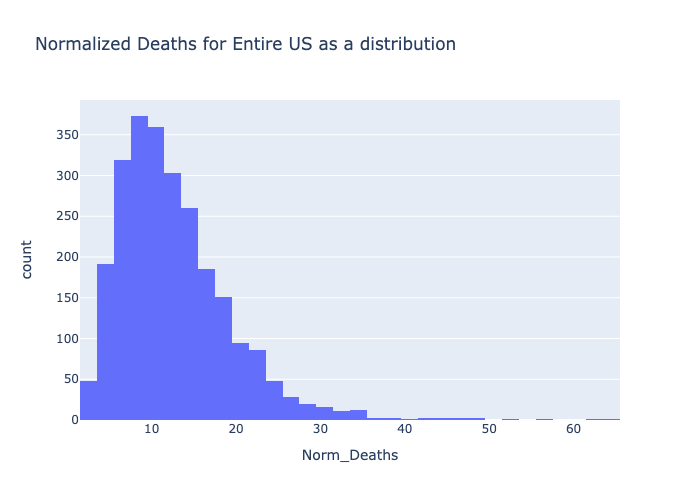

In [3]:
fig = px.histogram(df, x="Norm_Deaths", nbins=50, title='Normalized Deaths for Entire US as a distribution')
fig.show()

fig.write_image("../../../../images/vijay/Norm_Deaths.png")


#plt.imshow(mpimg.imread('../../../../images/vijay/Norm_Deaths.png'))

Image(filename='../../../../images/vijay/Norm_Deaths.png')


In [4]:
state_mean=df.groupby(['State'], as_index = False)['Norm_Deaths'].agg(['mean', 'median'])
state_mean

mean  median
State                   
AK     11.600000    11.0
AL      9.583333     8.0
AR      9.428571     9.0
AZ     15.933333    16.0
CA     15.245614    13.0
CO     12.521739    12.0
CT     17.000000    18.0
DC     22.000000    22.0
DE     18.666667    19.0
FL     15.409091    15.5
GA     10.272059     9.0
HI     11.500000    11.5
IA      6.000000     6.0
ID      9.413793     9.0
IL     10.034483     9.0
IN     13.362637    12.0
KS      8.613636     9.0
KY     19.551724    17.0
LA     13.016667    11.5
MA     17.428571    18.5
MD     18.500000    17.0
ME     13.875000    14.0
MI     12.219512    11.0
MN      7.263158     7.0
MO     11.455446    11.0
MS      8.542857     7.0
MT     12.083333    13.5
NC     14.444444    14.0
ND      6.000000     6.0
NE      5.600000     5.0
NH     16.700000    16.5
NJ     16.047619    14.0
NM     20.900000    19.5
NV     16.923077    18.0
NY      9.721311     9.0
OH     15.943182    15.0
OK     14.971014    14.0
OR     13.413793    12.0
PA     15.800000    15.0
RI     17.000000    15.0
SC     10.888889    11.0
SD      5.714286     5.0
TN     17.659574    17.5
TX      8.857955     8.0
UT     17.000000    16.0
VA     11.520000    10.0
VT     12.538462    12.0
WA     14.083333    14.0
WI      9.102941     8.0
WV     22.603774    19.0
WY     10.764706    11.0

In [5]:
mean_us=state_mean['mean'].mean()
median_us=state_mean['median'].median()
print(mean_us)
print(median_us)

13.22979580449677
12.0


- mean values is 13.22 and Median is at 12.0
- so we can say from the below plot that average death count is around 12-13 per 100,000 population in US

### Normalized deaths variable Histogram with a 'vline'  for mean and median
- mean 'vline' is RED and median 'vline' is 'BLACK'

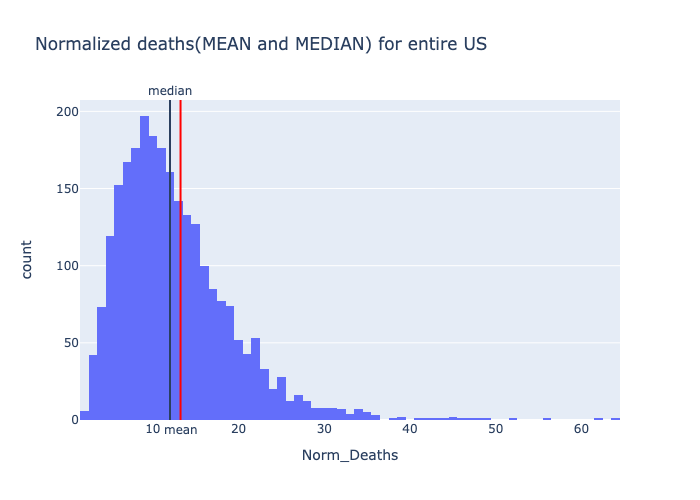

In [6]:
fig = px.histogram(df, x="Norm_Deaths", nbins=100, title='Normalized deaths(MEAN and MEDIAN) for entire US')
fig.add_vline(x= mean_us,line_color='red', annotation_text='mean', annotation_position='bottom')
fig.add_vline(x=median_us, annotation_text='median', annotation_position='top')
fig.show()

fig.write_image("../../../../images/vijay/vlinefig.png")


#plt.imshow(mpimg.imread('../../../../images/vijay/vlinefig.png'))
Image(filename='../../../../images/vijay/vlinefig.png')


In [7]:
df_n=df[['County', 'Norm_Deaths']]
df_n

County  Norm_Deaths
0              Abbeville County, SC          8.0
1                 Acadia Parish, LA         19.0
2               Accomack County, VA         11.0
3                    Ada County, ID         13.0
4                  Adair County, KY         12.0
...                             ...          ...
2522                Yuba County, CA         11.0
2523  Yukon-Koyukuk Census Area, AK         11.0
2524                Yuma County, AZ         12.0
2525              Zapata County, TX          6.0
2526              Zavala County, TX          7.0

[2527 rows x 2 columns]

In [8]:
print(len(df_n))

2527


- The codification is based on the quantile distribution of the Normalized deaths

In [9]:
cat = []
for i in range (0, 1):
    for value in df_n["Norm_Deaths"]:
        if value >= 1.999 and value < 8.0:
            cat.append("v_low")
        elif value >= 8.0 and value < 11.0:
            cat.append("low")
        elif value >= 11.0 and value < 16.0 :
            cat.append("high")
        elif value >= 16.0 and value <= 64.0 :
            cat.append("v_high")

        
    
#df_n["cat"] = cat   

In [10]:
df_n["label"] = cat 

df_n

County  Norm_Deaths   label
0              Abbeville County, SC          8.0     low
1                 Acadia Parish, LA         19.0  v_high
2               Accomack County, VA         11.0    high
3                    Ada County, ID         13.0    high
4                  Adair County, KY         12.0    high
...                             ...          ...     ...
2522                Yuba County, CA         11.0    high
2523  Yukon-Koyukuk Census Area, AK         11.0    high
2524                Yuma County, AZ         12.0    high
2525              Zapata County, TX          6.0   v_low
2526              Zavala County, TX          7.0   v_low

[2527 rows x 3 columns]

In [11]:
print(len(cat))

2527


In [12]:
df_main = pd.merge(df, df_n)

In [13]:
df_main

County State  County Code  Population  Deaths  \
0              Abbeville County, SC    SC        45001      535389      38   
1                 Acadia Parish, LA    LA        22001     1279727     237   
2               Accomack County, VA    VA        51001      726189      73   
3                    Ada County, ID    ID        16001     8083452     988   
4                  Adair County, KY    KY        21001      387950      43   
...                             ...   ...          ...         ...     ...   
2522                Yuba County, CA    CA         6115     1468094     153   
2523  Yukon-Koyukuk Census Area, AK    AK         2290      129587      14   
2524                Yuma County, AZ    AZ         4027     3964172     468   
2525              Zapata County, TX    TX        48505      284033      16   
2526              Zavala County, TX    TX        48507      247499      16   

      Norm_Deaths  State FIPS Code  County FIPS Code  5-digit FIPS Code  \
0             8.0               45                 1              45001   
1            19.0               22                 1              22001   
2            11.0               51                 1              51001   
3            13.0               16                 1              16001   
4            12.0               21                 1              21001   
...           ...              ...               ...                ...   
2522         11.0                6               115               6115   
2523         11.0                2               290               2290   
2524         12.0                4                27               4027   
2525          6.0               48               505              48505   
2526          7.0               48               507              48507   

     State Abbreviation  ... Total male population raw value  \
0                    SC  ...                             NaN   
1                    LA  ...                             NaN   
2                    VA  ...                             NaN   
3                    ID  ...                             NaN   
4                    KY  ...                             NaN   
...                 ...  ...                             ...   
2522                 CA  ...                             NaN   
2523                 AK  ...                             NaN   
2524                 AZ  ...                             NaN   
2525                 TX  ...                             NaN   
2526                 TX  ...                             NaN   

      Female population 0-17 raw value  Female population 18-44 raw value  \
0                                  NaN                                NaN   
1                                  NaN                                NaN   
2                                  NaN                                NaN   
3                                  NaN                                NaN   
4                                  NaN                                NaN   
...                                ...                                ...   
2522                               NaN                                NaN   
2523                               NaN                                NaN   
2524                               NaN                                NaN   
2525                               NaN                                NaN   
2526                               NaN                                NaN   

      Female population 45-64 raw value  Female population 65+ raw value  \
0                                   NaN                              NaN   
1                                   NaN                              NaN   
2                                   NaN                              NaN   
3                                   NaN                              NaN   
4                                   NaN                              NaN   
...                                 ...  

### Plot for Normalized Deaths in x-axis and Population in y-axis

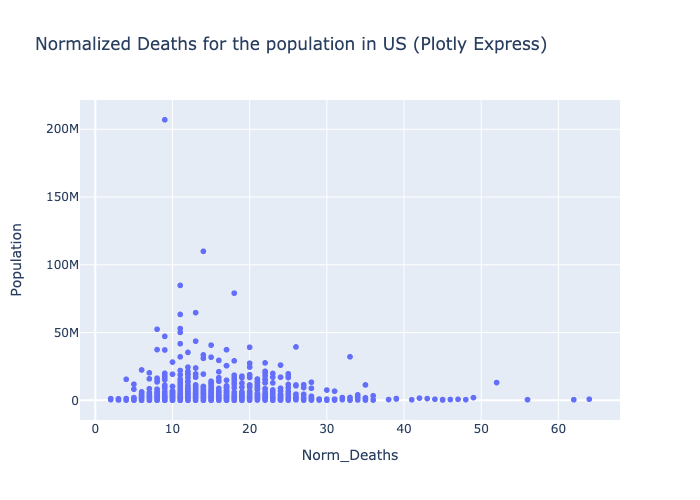

In [27]:

#df_main.plot.scatter('Norm_Deaths', 'Population', title='Normalized Deaths for the population in US')

fig = px.scatter(df, x= 'Norm_Deaths', y='Population', title = 'Normalized Deaths for the population in US (Plotly Express)')
fig.show()

fig.write_image("../../../../images/vijay/Norm_Deaths_&_Population.png")

#plt.imshow(mpimg.imread('../../../../images/vijay/Norm_Deaths_&_Population.png'))

Image(filename='../../../../images/vijay/Norm_Deaths_&_Population.png')


- below plot is for the Normalized deaths for each county (normalization factor is 100,000)

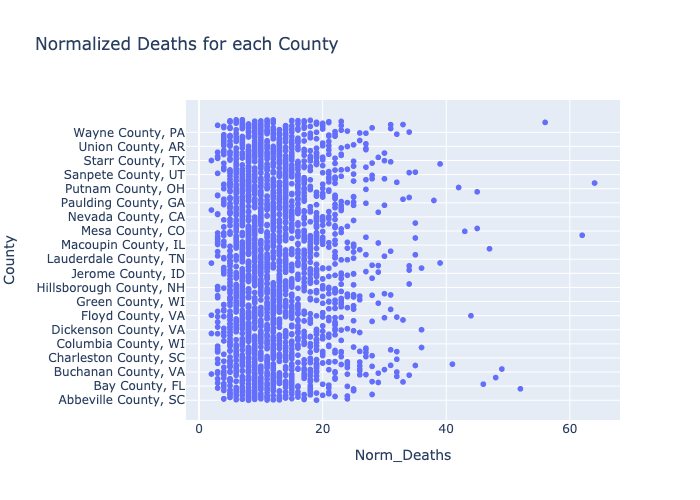

In [15]:
#df_main.plot.scatter('Norm_Deaths', 'County',title = 'Normalized Deaths for each County')

fig = px.scatter(df_main, x='Norm_Deaths', y='County', title = 'Normalized Deaths for each County')
fig.show()

fig.write_image("../../../../images/vijay/Norm_Deaths_&_County.png")

#plt.imshow(mpimg.imread('../../../../images/vijay/Norm_Deaths_&_County.png'))

Image(filename='../../../../images/vijay/Norm_Deaths_&_County.png')


- below plot is for normaliced deaths in x-axis and Deaths in y-axis

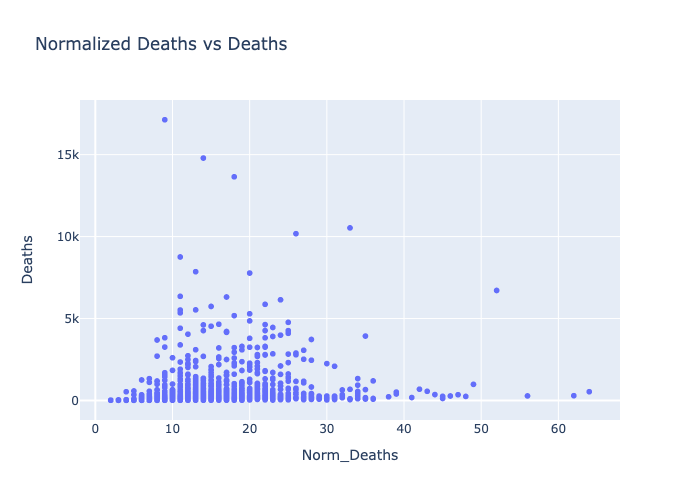

In [16]:
#df_main.plot.scatter('Norm_Deaths','Deaths', title = 'Normalized Deaths vs Deaths')

fig = px.scatter(df_main, x= 'Norm_Deaths', y='Deaths', title = 'Normalized Deaths vs Deaths')
fig.show()

fig.write_image("../../../../images/vijay/Norm_Deaths_&_Deaths.png")

#plt.imshow(mpimg.imread('../../../../images/vijay/Norm_Deaths_&_Deaths.png'))
Image(filename='../../../../images/vijay/Norm_Deaths_&_Deaths.png')


- Below plot is for the normalized deaths VS Life Expectancy
- We can clearly say that we have more life expectancy rates in the areas with low opioid related deaths

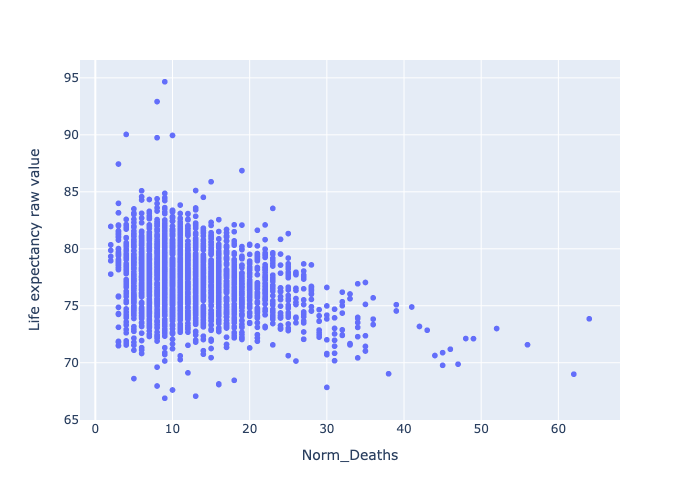

In [17]:
#df_main.plot.scatter('Life expectancy raw value','Norm_Deaths', title = 'Life expectancy VS Normalized Deaths')
fig = px.scatter(df_main, x= 'Norm_Deaths', y='Life expectancy raw value')
fig.show()

fig.write_image("../../../../images/vijay/Norm_Deaths_&_Life_Expectancy.png")

#plt.imshow(mpimg.imread('../../../../images/vijay/Norm_Deaths_&_Life_Expectancy.png'))
Image(filename='../../../../images/vijay/Norm_Deaths_&_Life_Expectancy.png')


- below plot is for normalized deaths in x-axis and unemployment raw rate in y-axis
- relation between unemployment and the normalized deaths cannot be determined as they are not related with each other in the given data

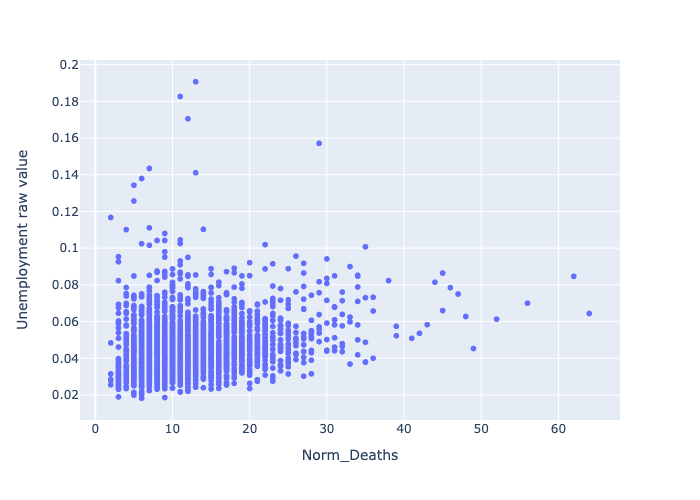

In [18]:
#df_main.plot.scatter('Unemployment raw value', 'Norm_Deaths', title='Unemployment rate VS Normalized Deaths')
fig = px.scatter(df_main, x= 'Norm_Deaths', y='Unemployment raw value')
fig.show()
fig.write_image("../../../../images/vijay/Norm_Deaths_&_Unemployment.png")

#plt.imshow(mpimg.imread('../../../../images/vijay/Norm_Deaths_&_Unemployment.png'))

Image(filename='../../../../images/vijay/Norm_Deaths_&_Unemployment.png')


- below plot is for the normalized deaths for the state

#### from the below plot we can see that we have more number of deaths in the states like West Virginia, Kentucky, New Mexico, California, Maryland

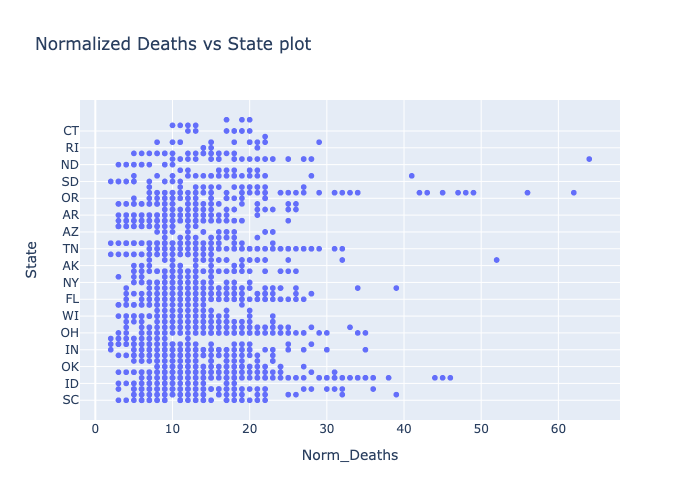

In [19]:
fig = px.scatter(df_main, x= 'Norm_Deaths', y='State', title = 'Normalized Deaths vs State plot')
fig.show()

fig.write_image("../../../../images/vijay/Norm_Deaths_&_State.png")

#plt.imshow(mpimg.imread('../../../../images/vijay/Norm_Deaths_&_State.png'))

Image(filename='../../../../images/vijay/Norm_Deaths_&_State.png')


In [20]:
data = pd.read_csv("../../../../data/123Merged.csv")

- Below plot is for the normalized deaths in the x-axis to the Opioid Dispensing Rates
#### from the below plot we can say that almost all the opioid dispensing rates range in between 60-80 and there are less cases of more deaths and usually deaths range around 20 for 100,000 population

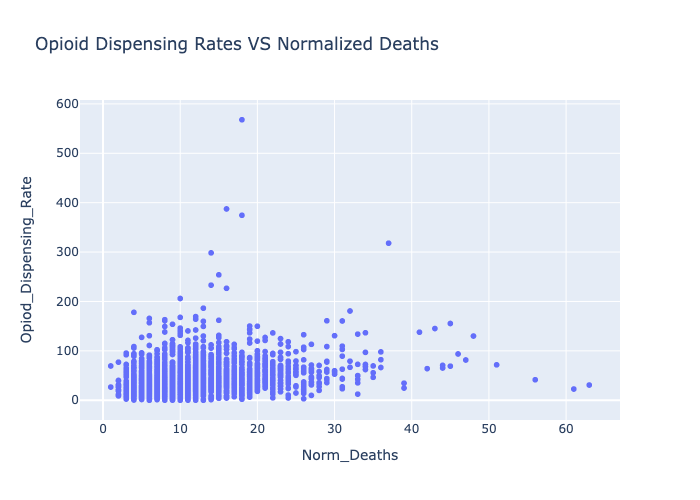

In [21]:
#data.plot.scatter('Opiod_Dispensing_Rate', 'Norm_Deaths', title = 'Opioid Dispensing Rates VS Normalized Deaths')
fig = px.scatter(data, x= 'Norm_Deaths', y='Opiod_Dispensing_Rate', title = 'Opioid Dispensing Rates VS Normalized Deaths')
fig.show()


fig.write_image("../../../../images/vijay/Norm_Deaths_&_Opiod_Dispensing_Rate.png")

#plt.imshow(mpimg.imread('../../../../images/vijay/Norm_Deaths_&_Opiod_Dispensing_Rate.png'))

Image(filename='../../../../images/vijay/Norm_Deaths_&_Opiod_Dispensing_Rate.png')


## PLOTLY WIDGET in JUPYTER

In [22]:

import plotly.graph_objects as go
from ipywidgets import widgets

In [23]:
dataframe = pd.read_csv("../../../../data/123Merged.csv")

In [24]:
dataframe

State   FIPS  Opiod_Dispensing_Rate                 County  County Code  \
0       AL   1001                  101.3     Autauga County, AL         1001   
1       AL   1003                   67.6     Baldwin County, AL         1003   
2       AL   1005                   27.2     Barbour County, AL         1005   
3       AL   1007                   21.0        Bibb County, AL         1007   
4       AL   1009                   23.7      Blount County, AL         1009   
...    ...    ...                    ...                    ...          ...   
2522    WY  56033                   33.5    Sheridan County, WY        56033   
2523    WY  56037                   70.0  Sweetwater County, WY        56037   
2524    WY  56039                   54.6       Teton County, WY        56039   
2525    WY  56041                   59.5       Uinta County, WY        56041   
2526    WY  56043                   46.7    Washakie County, WY        56043   

      Population  Deaths  Norm_Deaths  State FIPS Code  County FIPS Code  ...  \
0        1087149      83          7.0                1                 1  ...   
1        3758097     535         15.0                1                 3  ...   
2         574442      14          2.0                1                 5  ...   
3         464942      56         12.0                1                 7  ...   
4        1171455     168         14.0                1                 9  ...   
...          ...     ...          ...              ...               ...  ...   
2522      598998      61         10.0               56                33  ...   
2523      873221     123         14.0               56                37  ...   
2524      440125      13          3.0               56                39  ...   
2525      426347      61         14.0               56                41  ...   
2526      172114      14          8.0               56                43  ...   

      Male population 18-44 raw value Male population 45-64 raw value  \
0                                 NaN                             NaN   
1                                 NaN                             NaN   
2                                 NaN                             NaN   
3                                 NaN                             NaN   
4                                 NaN                             NaN   
...                               ...                             ...   
2522                              NaN                             NaN   
2523                              NaN                             NaN   
2524                              NaN                             NaN   
2525                              NaN                             NaN   
2526                              NaN                             NaN   

     Male population 65+ raw value  Total male population raw value  \
0                              NaN                              NaN   
1                              NaN                              NaN   
2                              NaN                              NaN   
3                              NaN                              NaN   
4                              NaN                              NaN   
...                            ...                              ...   
2522                           NaN                              NaN   
2523                           NaN                              NaN   
2524                           NaN                              NaN   
2525                           NaN                              NaN   
2526                           NaN                              NaN   

      Female population 0-17 raw value  Female population 18-44 raw value  \
0                                  NaN                                NaN   
1                                  NaN                                NaN   
2                                  NaN                                NaN   
3                                

In [25]:
#column=['Opiod_Dispensing_Rate', 'Unemployment raw value', 'Life expectancy raw value']

In [26]:
from ipywidgets import interact



@interact(column=['Opiod_Dispensing_Rate', 'Unemployment raw value', 'Life expectancy raw value', 'County', 'State', 'Population'])
def plot(column):
    scatter= px.scatter(dataframe, x = 'Norm_Deaths', y = column, title = 'Normalized Deaths VS '+ column )
    return scatter
#plot(column)


interactive(children=(Dropdown(description='column', options=('Opiod_Dispensing_Rate', 'Unemployment raw value…